# Mini-project 1: WARMUP - A dataset with CSV and JSON

In this mini-project, we will generate a fake dataset to warmup with dictionaries, functional programming, and the following libraries: `csv`, `json`, `itertools`, `numpy` and `matplotlib`.

## 1. Generate composed names
### 1.1. Define the generation function

Write a custom function that returns a list of permutations to create fake composed names separated by a dash, e.g. `Alice-Maria`. 

Be careful:
* The function has 1 input parameter: a list of first names ; and returns the list of permutations with a "-" in-between
* The output list must also include the opposite, e.g. `Alice-Maria` and also `Maria-Alice`
* The output list must not contain repetitions, e.g. `Bob-Bob` (this is a permutation, not a product)

Although Python has tools to do this in some modules, it is a good exercise to start from an exmpty list and fill it progressively with functions we know.

In [1]:
# My code here [...]

In [2]:
def generate_composed_names(names: list[str]) -> list[str]:
    output = []
    for name in names:
        for name2 in names:
            if name != name2:
                output.append(name + "-" + name2)
    return output

### 1.2. Function call and comparison to other functions

Here is a list of 11 first names
```
names = ["Bob", "Alice", "Maria", "Albert", "Paul", "Alex", "Luc", "Robert", "Dylan", "Léa", "Richard"]
```
The function call with this list must return exactly 110 composed names (i.e. the exact number of permutations w/o repetition of 11 elements) stored in a variables named `composed_names`.


Use the magic `%%timeit` at the beginning of a cell to repeat it and get its average duration of execution.
Compare the durations of:
- The average duration of the only call to [`itertools.permutations`](https://docs.python.org/3/library/itertools.html) (with the relevant parameters to generate the composed names)
- The average duration of the call to `itertools.permutations` converted in list
- The average duration of the list-comprehension of the actual composed names separated by a dash: "Bob-Alice", "Bob-Maria", ...
- The average duration of a call to your custom function

In [3]:
# My code here [...]

In [4]:
names = ["Bob", "Alice", "Maria", "Albert", "Paul", "Alex", "Luc", "Robert", "Dylan", "Léa", "Richard"]
from itertools import permutations

In [5]:
%%timeit
permutations(names, 2)

124 ns ± 3.87 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [6]:
%%timeit
list(permutations(names, 2))

3.01 µs ± 61.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [7]:
%%timeit
[a + "-" + b for a, b in permutations(names, 2)]

12.9 µs ± 1.72 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [8]:
%%timeit
generate_composed_names(names)

18.3 µs ± 528 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# 2. Generate characters as first + last names
## 2.1. Define the generation function

Write a custom function that returns a list of combinations of composed names and last names separated by a space, e.g. `Paul-Robert Loiseau`.

Be careful:
* The function has 2 input parameters: a list of composed first names and a list of last names ; and returns a list of combinations
* It means that for each last name, we will insert in the resulting list as many characters as there are names in the list of first names
* Your list must be in this order: **first name and then last name**, thus it must not contain `Tournesol Paul-Alex` for instance.


In [9]:
# My code here [...]

In [10]:
def generate_characters(names: list[str], surnames: list[str]) -> list[str]:
    output = []
    for name in names:
        for surname in surnames:
            output.append(name + " " + surname)
    return output

### 2.2. Function call

Here is a list of 11 last names (from the stories of Tintin):
```
surnames = ["Dupont", "Dupond", "Haddock", "Tournesol", "Castafiore", "Lampion", "Lopez", "Loiseau", "Müller", "Sanzot"]
```

The function calls of the function from `3.1.2.` and this one must finally return exactly 1100 characters, stored in a variable named `characters`.

Use the magic `%%timeit` to compare the speed of execution of your custom function with [`itertools.product`](https://docs.python.org/3/library/itertools.html). Compare:
- The average duration of the only call to `itertools.product` 
- The average duration of the call to `itertools.product` converted in list
- The average duration of the list-comprehension of the actual composed names separated by a dash
- The average duration of a call to your custom function

In [11]:
# My code here [...]

In [12]:
surnames = ["Dupont", "Dupond", "Haddock", "Tournesol", "Castafiore", "Lampion", "Lopez", "Loiseau", "Müller", "Sanzot"]
from itertools import product
composed_names = generate_composed_names(names)

In [13]:
%%timeit
product(composed_names, surnames)

452 ns ± 31.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [14]:
%%timeit
list(product(composed_names, surnames))

34.5 µs ± 1.26 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [15]:
%%timeit
[" ".join(full_name) for full_name in product(composed_names, surnames)]

146 µs ± 13.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [16]:
%%timeit
generate_characters(composed_names, surnames)

164 µs ± 9.91 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [17]:
characters = [" ".join(full_name) for full_name in product(composed_names, surnames)]

## Intermediary conclusion

In the context of this project, our custom functions have the poorest performance compared to the comprehensions because:
- There is a function call every time
- We generate useless data in composed names (e.g. "Bob-Bob" that we filter with a `if` statement later

In general, it is always advisable to use functions coming from builtin modules, such as `itertools`, instead of equivalent custom functions. Resources of builtin modules are full of micro-optimizations to reduce both time and space complexities.

# 3. Import data from a CSV file

We will associate to these characters exam marks generated by another program in a CSV file.
Use the documentation of the [`csv`](https://docs.python.org/3/library/csv.html) module for the next questions:

## 3.1. Load the file

Manually download the file [`exams.csv`](https://raw.githubusercontent.com/ymollard/python-advanced-slides/main/exercises/data/exams.csv?token=AAZEO6XULYU2ZIIZJLGSD4DBVANQC). With Python, open it, load its content, and transform-it in order to get marks by discipline, for instance `math_marks = [15, 13...]`

In [ ]:
# My code loading the CSV and displaying the means and std per discipline [...]

In [18]:
import csv

french_marks = []
math_marks = []
philo_marks = []

with open("/tmp/exams.csv") as f:
    reader = csv.reader(f, delimiter=',')
    for i, line in enumerate(reader):
        if i != 0:  # Skip the first line (column headers)
            french_marks.append(float(line[0]))
            math_marks.append(float(line[1]))
            philo_marks.append(float(line[2]))

Install the numerical module `numpy` with pip in your venv (in the PyCharm system terminal).

Use functions `numpy.mean()` et `numy.std()` to get the mean and the standard deviation of marks by discipline

In [19]:
import numpy
numpy.mean(french_marks), numpy.mean(math_marks), numpy.mean(philo_marks)

(10.308181818181819, 11.959545454545454, 8.563181818181818)

In [20]:
numpy.std(french_marks), numpy.std(math_marks), numpy.std(philo_marks)

(3.4537234667998487, 4.760581493580883, 4.495033508180937)

## 3.2. Plot the density of marks

A density plot shows, for each of the 40 possible notes in the horizontal axis (from 0 to 20 with a 0.5 step), the number of occurences of this mark, on the vertical axis. This is a way to check how data are distributed. We could build this plot by hand but popular Python libraries do it for us. 

Install the statistical module `pandas`, the plot module `matplotlib` and the scientific module `scipy` with pip in your venv (in the PyCharm system terminal).

Use [pandas.DataFrame.plot.density](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.density.html) to plot the density of marks.

In [21]:
# Plot the density here [...]

<AxesSubplot:ylabel='Density'>

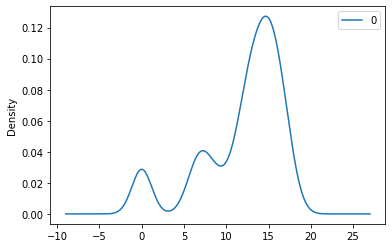

In [22]:
import pandas
frame = pandas.DataFrame(math_marks)
frame.plot.density()

## 3. Create an adapter data structure
Transform the data you read in a data structure made of nested dictionaries and/or lists.

The structure must represtent the name of students as well as their marks to the 3 exams

For instance:
```
{
  "Alice-Maria Lampion" : {"math": 15, "french": 10, "philosophy": 11.5},
  "Paul-Alex Loiseau" : {"math": 8.5, "french": 17, "philosophy": 15},
  ...
}
```


In [23]:
# My code creating the data structure here [...]

In [24]:
dataset = {}
for i_full_name, full_name in enumerate(characters):
    try:
        dataset[full_name] = {
            "math": math_marks[i_full_name],
            "french": french_marks[i_full_name],
            "philosophy": philo_marks[i_full_name]
        }
    except IndexError:
        # If we miss marks from the CSV, IndexError will be raised, in that case stop and keep the dataset built so far
        break

## 3.1. Save you data structure in JSON

Import module `json` and use `json.dump()` to save your database un a file: `dataset.json`

Protip: add the paramter `indent=4` in order to make your JSON file readable by a human with a simple text editor. Open the file without Python to observer.

In [25]:
# My code saving the data structure in JSON here []

In [26]:
import json
with open("./dataset.json", "w") as f:
    json.dump(dataset, f)

## 3.2. Read and check

We are now going to check that we can load properly the JSON file with `json.load()`.

We will first crash voluntarily this Jupyter Notebook in order to start from scratch. Your code will remain in your browser but all variables will be lost.

In [ ]:
# We volontarily end the interpreter here to make sure all previous variables are cleared up.
import os
os._exit(0)

Now re-load the JSON file into a Python variable and consult the math mark of Paul-Robert Müller :

In [1]:
# My code loading the saved JSON dataset here [...]

In [2]:
import json
with open("./dataset.json") as f:
    dataset = json.load(f)

In [3]:
print("Here is a mark coming from the loaded JSON:", dataset["Paul-Robert Müller"]["math"])

Here is a mark coming from the loaded JSON: 6.0


## 3.3. Optional: adapt to malformed data

You crated a JSON file but some file already existed in the current directory. However this second file has many problems.

**Your goal**: Write a Python function that:
* opens all files from the current directory
* check if this is actually a file (not a directory)
* check if this is a JSON file (e.g. ends with `.json`)
* load the data and adapt to malformed data
* compute the mean in mathematics of all students in that directory

Use the module [`pathlib`](https://docs.python.org/fr/3/library/pathlib.html) to handle file paths, existence and type. Take note that `os.path` is now deprecated.

In [ ]:
# My optional code loading malformed JSON files here [...]

# Resources

* itertools: https://docs.python.org/3/library/itertools.html
* Functional programming: https://docs.python.org/3/howto/functional.html
* csv: https://docs.python.org/3/library/csv.html
* json: https://docs.python.org/fr/3/library/json.html
* pandas: https://pandas.pydata.org/pandas-docs/stable/

